### WEkEO Notebook - PART 2: Sea Surface Temperature Data Analysis Plots
#### Library imports:
######     pip install statsmodels
######     pip install seaborn
##### The "FunctionAggregatesPlots.py" contains functions for the SST Data Analysis. 
##### Therefore, the plots follow:
<ol>
<li>
Sea Surface Temperature Time Series, Daily Trend in the Adriatic Sea,</li>

<li> 
Sea Surface Temperature Standard Deviation in the Adriatic Sea,</li>

<li> 
Sea Surface Temperature Annual Trend in the Adriatic Sea,</li>

<li> 
Monthly Mean Sea Surface Temperature in the Adriatic Sea.</li>

</ol>


In [1]:
import xarray as xr
import pandas as pd
from matplotlib import rcParams

import FunctionAggregatesPlots as fap

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-68w_x2ca because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


The Time Series analysis have been generated by read previously clipped "CMEMS_SST_clipped_1D_FIXED_DIM" file in CSV format. Therefore,
The "faGenerateDailyTimeSeries" function read Daily Mean file through pandas and, parse dates with taking the list of "DATE" column 

In [2]:
NcFile1DoutputCSV= "/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST_clipped_1D_FIXED_DIM.csv"

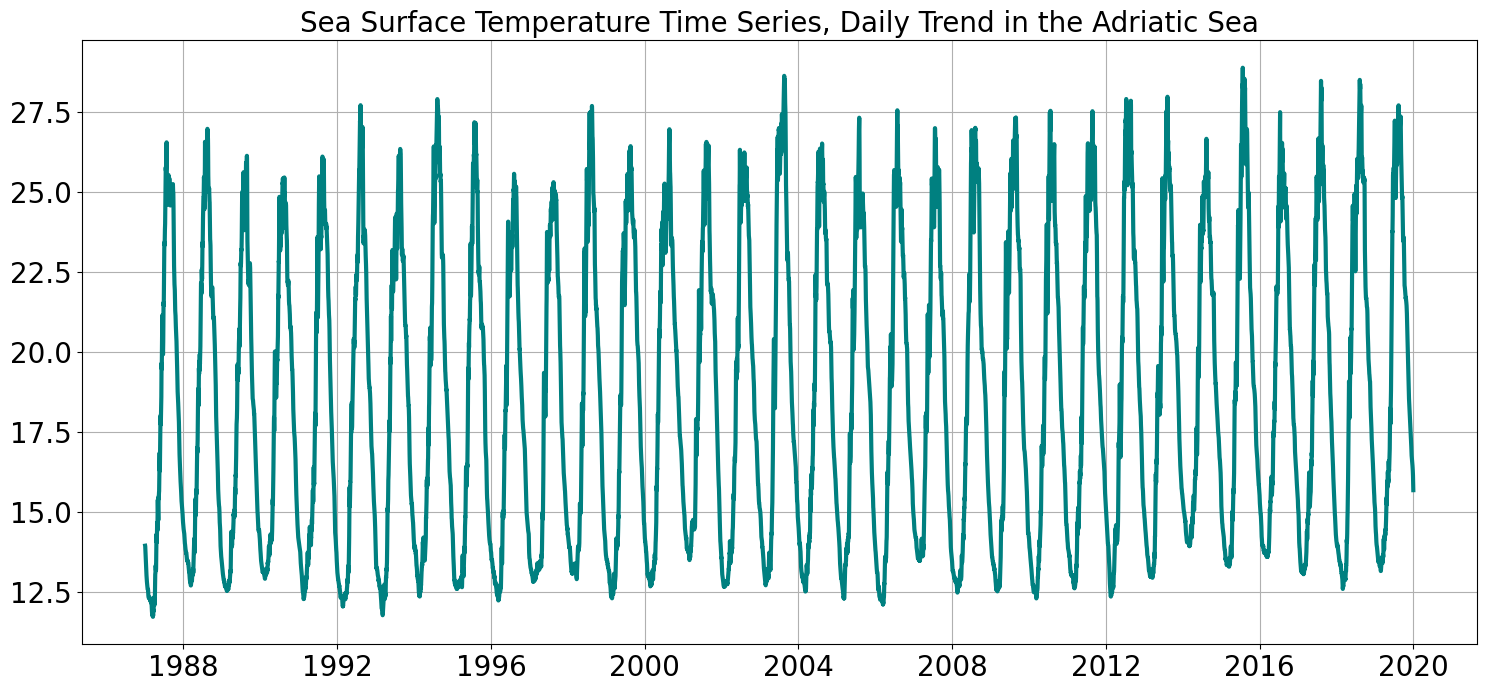

In [3]:
ts=fap.faGenerateDailyTimeSeries(NcFile1DoutputCSV)

"faGenerateDailyTimeSeriesSTD" function initially starts with groupby syntax to provide information on data in the "DATE" column in "Monthly Mean".

    fy_dt = file2.groupby(pd.Grouper(freq='M')).mean()

The window size equal to 12 has been choosen for the moving average calculation to  calculate standard deviation by year.

     daily_sdT = fy_dt.rolling(window = 12).std()


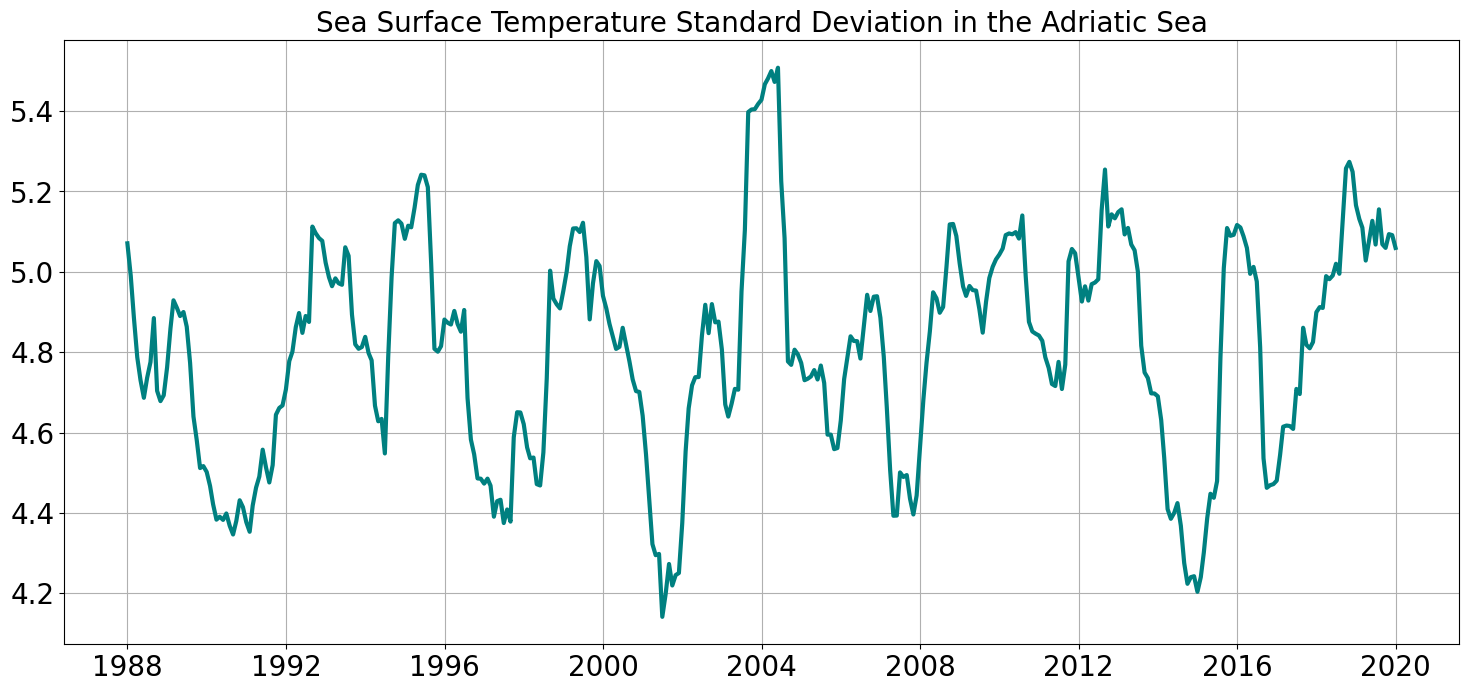

In [4]:
ts1=fap.faGenerateDailyTimeSeriesSTD(NcFile1DoutputCSV)

"faGenerate1DTendency" function show the Annual Trend in the Adriatic Sea. The input file is 1 Dimensional file in netCDF format.
Hence, the Linear Regression has been calculated, once created the data frame for the Annual Mean.  

    fy_1D= t.mean(dim=(lat_name, lon_name), skipna=True)    
    fy_dt = fy_1D.groupby('time.year').mean()
    df = fy_dt.to_dataframe().reset_index().set_index('year')
    
The horizontal axis has "df.index" by year while vertical axis has the Temperature with the variable name "thetao" in the Cartesian coordinate system.

In [5]:
ncRawDataFileName1 = "/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST_clipped.nc"
rawData1 = xr.open_dataset(ncRawDataFileName1)

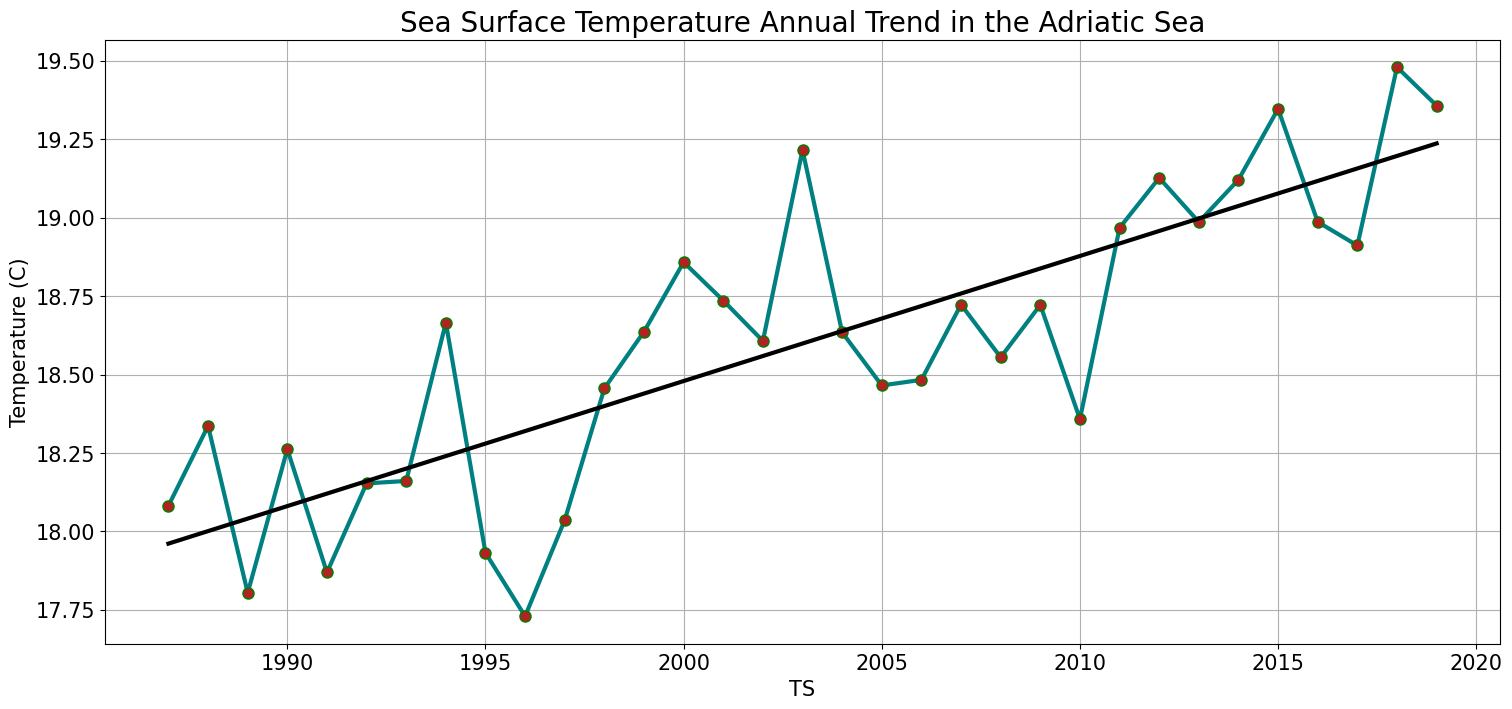

In [6]:
NcFile1Doutput = "/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_2_Aggregations/WEkEO_SST_DATA/CMEMS_SST_clipped_1D_FIXED_DIM.nc"
clippedfix1Tendency=fap.faGenerate1DTendency(rawData1,NcFile1Doutput)

The "faGenerateDailyTimeSeriesPLOT" function show the Monthly Mean in Violin Plot in the Adriatic Sea. The input file is 1 Dimensional file in CSV format. The Data distribution is shown by using Seaborn Library. 
The month names are converted in their full names with: 

     file2['month'] = [d.strftime('%b') for d in file2.DATE]
     

 

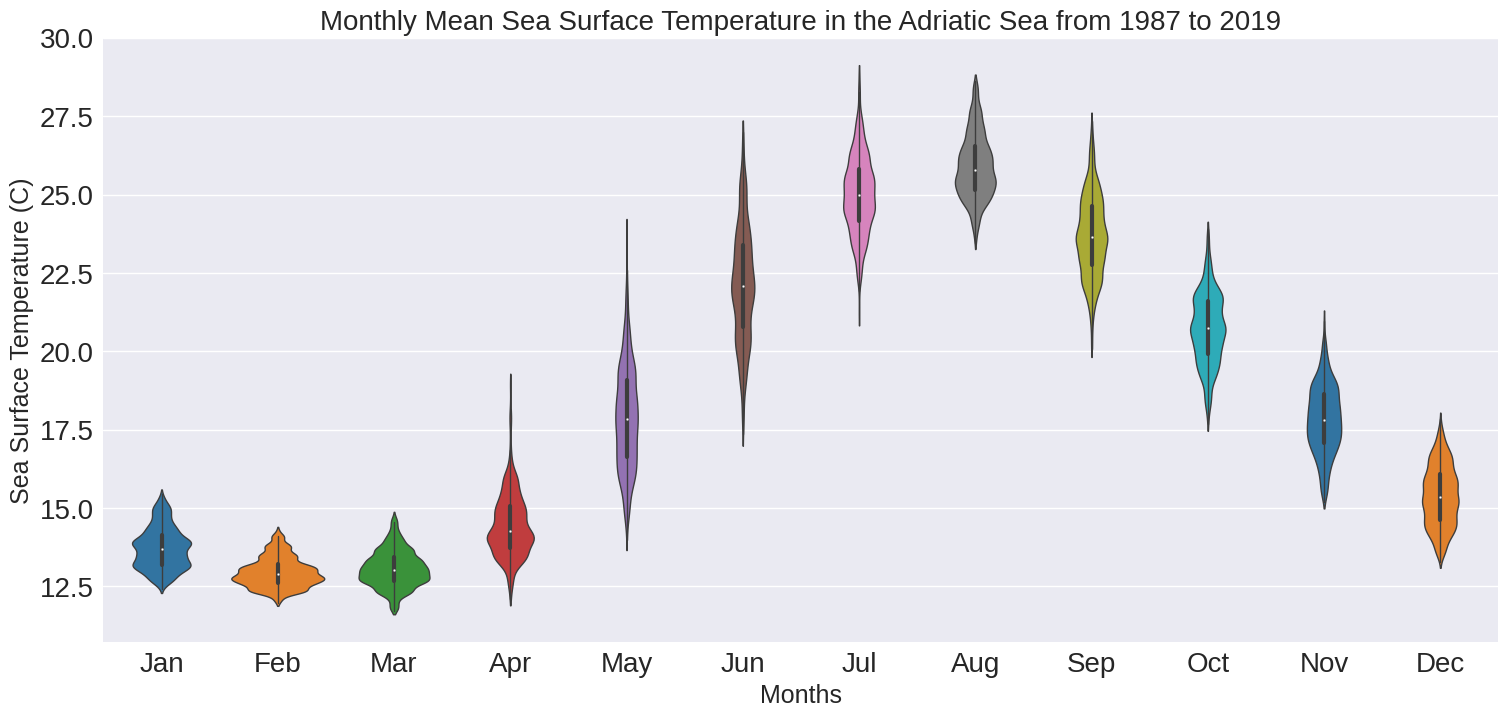

In [7]:
ts2=fap.faGenerateDailyTimeSeriesPLOT(NcFile1DoutputCSV)